In [2]:
import xarray as xr
import numpy as np
from datetime import datetime
import pandas as pd

In [3]:
from tqdm import tqdm

In [4]:
from glob import glob

In [5]:
import matplotlib.pyplot as plt

## convert processed wind hpl to nc

In [6]:
files = sorted(glob("/home/UOCNT/dli84/research/Bottle_lake/Field_data/Lidar_full_Burwood/Proc/2023/processed_wind_hpl/Processed_Wind_Profile_252_20230*.hpl"))

In [42]:
%%time
for file_path in tqdm(files,position=0, leave=True):
    ## change timestamp so it will be saved into netcdf
    ts = file_path[125:-4]
    datetime_format = "%Y%m%d_%H%M%S"

    # Parse the input string into a datetime object
    parsed_datetime = datetime.strptime(ts, datetime_format)
    
    ## read hpl file 
    with open(file_path, 'r') as text_file:
        lines=text_file.readlines()
    tot_line = int(lines[0].split()[0])
    distance = []
    wdir = []
    wspeed = []
    for i in range(1, tot_line):
        distance.append(float(lines[i].split()[0]))
        wdir.append(float(lines[i].split()[1]))
        wspeed.append(float(lines[i].split()[2]))
        
    ## output netcdf
    outfile_name = file_path.replace(".hpl",".nc")
    nc_output = xr.Dataset()
    nc_output.attrs['data_extration_time'] = str(parsed_datetime)
    nc_output.attrs['Conventions'] = 'CF-1.7'
    nc_output.attrs['Author'] = 'dongqi.lin@canterbury.ac.nz'
    nc_output['distance'] = xr.DataArray(np.array(distance), dims=['distance'], attrs={'units':'m'})

    nc_output.to_netcdf(outfile_name)

    nc_output['wdir'] = xr.DataArray(np.array(wdir),dims=['distance'], attrs={'units':'degree'})
    nc_output['wspeed'] = xr.DataArray(np.array(wspeed),dims=['distance'], attrs={'units':'m/s'})

    for var in nc_output.data_vars:
        encoding = {var: {'dtype': 'float32', '_FillValue': -9999, 'zlib':True}}
        nc_output[var].to_netcdf(outfile_name, mode ='a', encoding=encoding)

    nc_output.close()

100%|██████████| 2012/2012 [01:17<00:00, 25.91it/s]

CPU times: user 24.7 s, sys: 3.62 s, total: 28.3 s
Wall time: 1min 17s


## plotting 

In [6]:
ds = xr.open_dataset("/home/UOCNT/dli84/research/Bottle_lake/Field_data/Lidar_full_Burwood/Proc/2023/processed_wind_hpl/Processed_Wind_Profile_252_20230425_213527.nc")

Text(0, 0.5, 'Distance (m)')

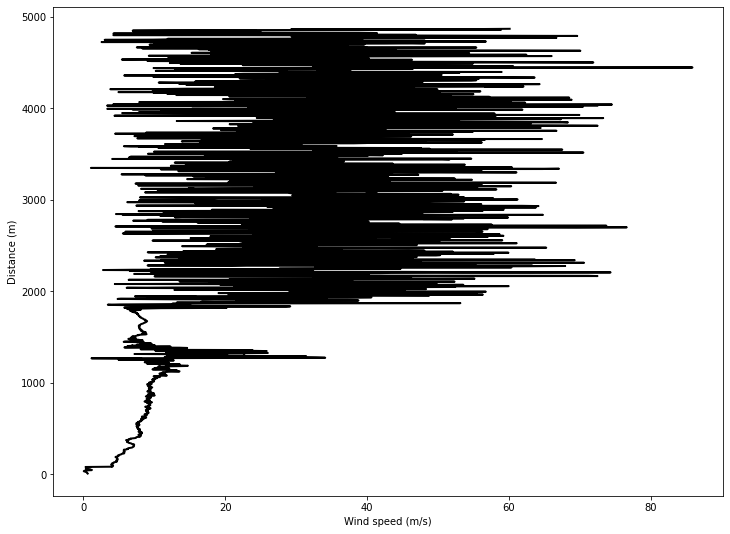

In [9]:
plt.figure(figsize=(12,9))
plt.plot(ds.wspeed, ds.distance, "k-", linewidth=2)
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Distance (m)")

Text(0, 0.5, 'Distance (m)')

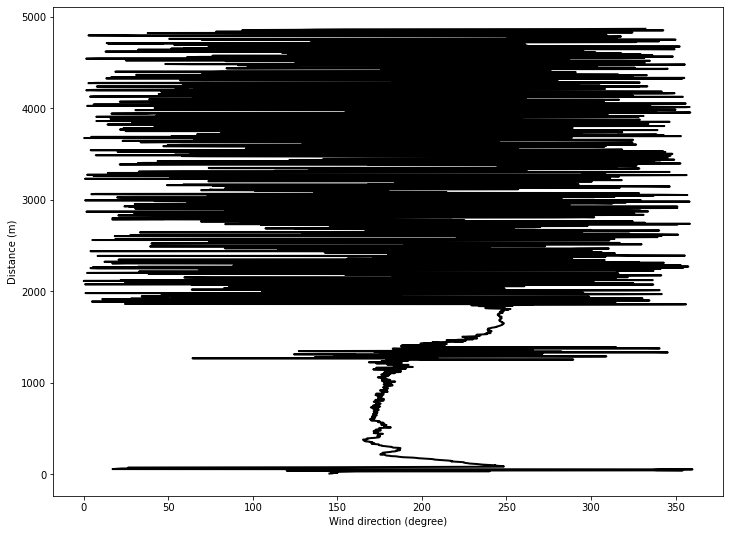

In [10]:
plt.figure(figsize=(12,9))
plt.plot(ds.wdir, ds.distance, "k-", linewidth=2)
plt.xlabel("Wind direction (degree)")
plt.ylabel("Distance (m)")